# Libraries

In [1416]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data preparation and clearning

In [1417]:
df = pd.read_csv('https://raw.githubusercontent.com/gialkady/ml_zoomcamp/Homeworks/Midterm%20Project/Data/NetflixOriginals.csv',encoding='latin-1') 

In [1418]:
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [1419]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [1420]:
df.shape

(584, 6)

In [1421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Comment: although Premiere includes date, it has an object data type. 
It should be converted it into a datetime. 

# Clean Premiere

In [1422]:
df["Date"] = pd.to_datetime(df.Premiere)
df["Date"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

In [1423]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30


- Divide date into year, month, and date 
- This will be very useful in the analysis.


In [1424]:
df['Year'] = df['Date'].apply(lambda x:x.year)
df['Month'] = df['Date'].apply(lambda x:x.month)
df['Week Day'] = df['Date'].apply(lambda x:x.dayofweek)

In [1425]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,Week Day
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,0
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,4
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,3
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,4
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,4


In [1426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
 7   Year        584 non-null    int64         
 8   Month       584 non-null    int64         
 9   Week Day    584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 45.8+ KB


In [1427]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Week Day'] = df['Week Day'].map(dmap)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,Week Day
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,8,Mon
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,8,Fri
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,12,Thu
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,1,Fri
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,10,Fri


In [1428]:
mmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7: 'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Month'].map(mmap)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Year,Month,Week Day
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,Aug,Mon
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,Aug,Fri
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,Dec,Thu
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,Jan,Fri
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,Oct,Fri


I try to clean the data futher by transforing the column named "IMDB SCORES" into "rating" so it will be more easy to work with.

In [1429]:
df.rename(columns={'IMDB Score':'rating'},inplace=True)
df.head()

,Title,Genre,Premiere,Runtime,rating,Language,Date,Year,Month,Week Day
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019,Aug,Mon
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020,Aug,Fri
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019,Dec,Thu
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018,Jan,Fri
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020,Oct,Fri


In [1430]:
df.isnull().sum()

Title       0
Genre       0
Premiere    0
Runtime     0
rating      0
Language    0
Date        0
Year        0
Month       0
Week Day    0
dtype: int64

Comment: no missing value at all.

In [1431]:
df.isna().any()

Title       False
Genre       False
Premiere    False
Runtime     False
rating      False
Language    False
Date        False
Year        False
Month       False
Week Day    False
dtype: bool

In [1432]:
df.duplicated().value_counts()

False    584
dtype: int64

In [1433]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'rating', 'Language', 'Date',
       'Year', 'Month', 'Week Day'],
      dtype='object')

In [1434]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [1435]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['title', 'genre', 'premiere', 'language', 'month', 'week_day']

In [1436]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [1437]:
df.head()

,title,genre,premiere,runtime,rating,language,date,year,month,week_day
0,enter_the_anime,documentary,"august_5,_2019",58,2.5,english/japanese,2019-08-05,2019,aug,mon
1,dark_forces,thriller,"august_21,_2020",81,2.6,spanish,2020-08-21,2020,aug,fri
2,the_app,science_fiction/drama,"december_26,_2019",79,2.6,italian,2019-12-26,2019,dec,thu
3,the_open_house,horror_thriller,"january_19,_2018",94,3.2,english,2018-01-19,2018,jan,fri
4,kaali_khuhi,mystery,"october_30,_2020",90,3.4,hindi,2020-10-30,2020,oct,fri


In [1438]:
df.describe()

,runtime,rating,year
count,584.000000,584.000000,584.000000
mean,93.577055,6.271747,2018.936644
std,27.761683,0.979256,1.473992
min,4.000000,2.500000,2014.000000
25%,86.000000,5.700000,2018.000000
50%,97.000000,6.350000,2019.000000
75%,108.000000,7.000000,2020.000000
max,209.000000,9.000000,2021.000000


All values normal 

# Exploratory data analysis (EDA)

# 1- Genre

In [1004]:
df.genre.nunique()

114

In [1005]:
genre = df.genre.unique()
len(genre)

114

In [1006]:
df.genre.value_counts()

documentary                             159
drama                                    77
comedy                                   49
romantic_comedy                          39
thriller                                 33
                                       ... 
romantic_comedy-drama                     1
heist_film/thriller                       1
musical/western/fantasy                   1
horror_anthology                          1
animation/christmas/comedy/adventure      1
Name: genre, Length: 114, dtype: int64

In [1007]:
top_20_genre = df.genre.value_counts().nlargest(20)
top_20_genre

documentary                 159
drama                        77
comedy                       49
romantic_comedy              39
thriller                     33
comedy-drama                 14
crime_drama                  11
horror                        9
biopic                        9
action                        7
concert_film                  6
aftershow_/_interview         6
romance                       6
animation                     5
variety_show                  5
action_comedy                 5
romantic_drama                5
psychological_thriller        4
science_fiction/thriller      4
science_fiction               4
Name: genre, dtype: int64

Comment: Documentary genre are at the top followed by Drama genre

In [1008]:
top_20_genre.index

Index(['documentary', 'drama', 'comedy', 'romantic_comedy', 'thriller',
       'comedy-drama', 'crime_drama', 'horror', 'biopic', 'action',
       'concert_film', 'aftershow_/_interview', 'romance', 'animation',
       'variety_show', 'action_comedy', 'romantic_drama',
       'psychological_thriller', 'science_fiction/thriller',
       'science_fiction'],
      dtype='object')

In [1009]:
top_20_genre.values

array([159,  77,  49,  39,  33,  14,  11,   9,   9,   7,   6,   6,   6,
         5,   5,   5,   5,   4,   4,   4])

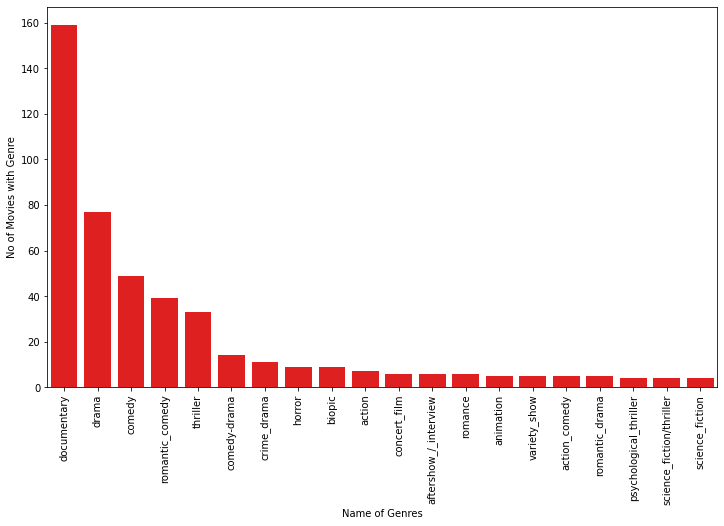

In [1010]:
plt.figure(figsize=(12,7))
sns.barplot(x=top_20_genre.index,y=top_20_genre.values,data=df,color='Red')
plt.xticks(rotation=90)
plt.xlabel('Name of Genres')
plt.ylabel('No of Movies with Genre')
plt.show()

# 2- Runtime

In [1011]:
df.runtime

0       58
1       81
2       79
3       94
4       90
      ... 
579    125
580     91
581    153
582     89
583     83
Name: runtime, Length: 584, dtype: int64

In [1012]:
df.runtime.unique()

array([ 58,  81,  79,  94,  90, 147, 112, 149,  73, 139,  97, 101,  25,
       144, 115, 102, 100,  64,  99, 120, 105,  89, 107,  95,  37,  83,
        46,  85,  88,  86,  80,   4,  93, 106, 103, 119,  96, 113, 104,
        10,  98, 117,  70, 131,  87,  60, 116,  92, 121,  78, 114,  56,
        21,  63, 126, 142, 108, 125,  91,  49, 118,  34, 124,  52, 111,
        75, 148,  32,  23,  53, 132, 123, 122, 128,  82,  84,  42, 151,
        72,  30, 129,  44, 134, 109,  16,  41,  28,  74,   9, 155,  55,
        40,  17, 136, 130,  19,  54,  76,  39,   7,  57,  14,  31,  48,
        27,  45,  36,  47, 110, 138, 133, 140,  13,  11,  24,  15,  26,
       137,  71, 135,  12, 209,  51, 153])

In [1013]:
df.runtime.nunique()

124

In [1014]:
df.runtime.value_counts()

97     24
98     19
94     19
95     18
100    17
       ..
148     1
147     1
7       1
57      1
153     1
Name: runtime, Length: 124, dtype: int64

In [1015]:
top_20_runtime = df.runtime.value_counts().nlargest(20)
top_20_runtime

97     24
98     19
94     19
95     18
100    17
92     17
89     16
90     16
101    15
102    14
104    13
96     13
99     13
105    12
106    12
83     12
112    12
85     11
108    11
86     11
Name: runtime, dtype: int64

In [1016]:
top_20_runtime.index

Int64Index([ 97,  98,  94,  95, 100,  92,  89,  90, 101, 102, 104,  96,  99,
            105, 106,  83, 112,  85, 108,  86],
           dtype='int64')

In [1017]:
top_20_runtime.values

array([24, 19, 19, 18, 17, 17, 16, 16, 15, 14, 13, 13, 13, 12, 12, 12, 12,
       11, 11, 11])

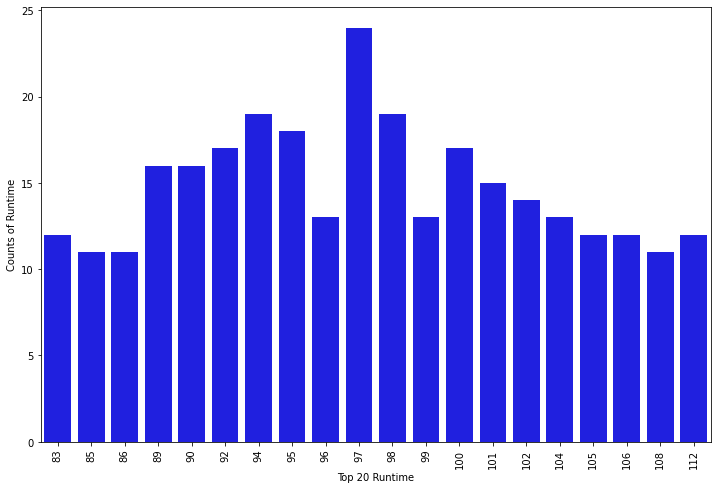

In [1018]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_20_runtime.index,y=top_20_runtime.values,data=df,color='blue',)
plt.xlabel('Top 20 Runtime')
plt.xticks(rotation=90)
plt.ylabel('Counts of Runtime')
plt.show()

<AxesSubplot:xlabel='runtime', ylabel='Count'>

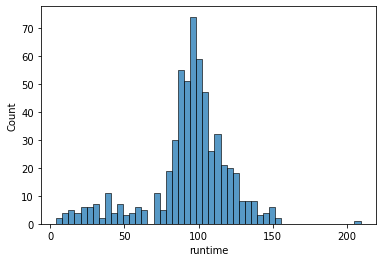

In [1019]:
sns.histplot(x='runtime',data=df,bins=50)

Comment: left side of the data is not uniformly distributed so the distribution is negatively skewed.

<AxesSubplot:xlabel='runtime', ylabel='Count'>

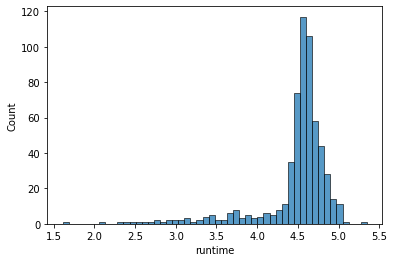

In [1020]:
runtime_logs = np.log1p(df.runtime)
sns.histplot(runtime_logs,bins=50)

In [1021]:
# longest movie 
df[df['runtime']==df['runtime'].max()]['title']

561    the_irishman
Name: title, dtype: object

In [1022]:
# shortest movie
df[df['runtime']==df['runtime'].min()]['title']

40    sol_levante
Name: title, dtype: object

Comment: The longest movie is Irishman and the shorest movie is Sol Levante.

# 3- Language

In [1023]:
df.language.unique()

array(['english/japanese', 'spanish', 'italian', 'english', 'hindi',
       'turkish', 'korean', 'indonesian', 'malay', 'dutch', 'french',
       'english/spanish', 'portuguese', 'filipino', 'german', 'polish',
       'norwegian', 'marathi', 'thai', 'swedish', 'japanese',
       'spanish/basque', 'spanish/catalan', 'english/swedish',
       'english/taiwanese/mandarin', 'thia/english', 'english/mandarin',
       'georgian', 'bengali', 'khmer/english/french', 'english/hindi',
       'tamil', 'spanish/english', 'english/korean', 'english/arabic',
       'english/russian', 'english/akan', 'english/ukranian/russian'],
      dtype=object)

In [1024]:
df.language.value_counts()

english                       401
hindi                          33
spanish                        31
french                         20
italian                        14
portuguese                     12
indonesian                      9
japanese                        6
korean                          6
german                          5
turkish                         5
english/spanish                 5
polish                          3
dutch                           3
marathi                         3
english/hindi                   2
thai                            2
english/mandarin                2
english/japanese                2
filipino                        2
english/russian                 1
bengali                         1
english/arabic                  1
english/korean                  1
spanish/english                 1
tamil                           1
english/akan                    1
khmer/english/french            1
swedish                         1
georgian      

In [1025]:
df.language.nunique()

38

In [1026]:
top_20_langauge = df.language.value_counts().nlargest(20)
top_20_langauge

english             401
hindi                33
spanish              31
french               20
italian              14
portuguese           12
indonesian            9
japanese              6
korean                6
german                5
turkish               5
english/spanish       5
polish                3
dutch                 3
marathi               3
english/hindi         2
thai                  2
english/mandarin      2
english/japanese      2
filipino              2
Name: language, dtype: int64

In [1027]:
top_20_langauge.index

Index(['english', 'hindi', 'spanish', 'french', 'italian', 'portuguese',
       'indonesian', 'japanese', 'korean', 'german', 'turkish',
       'english/spanish', 'polish', 'dutch', 'marathi', 'english/hindi',
       'thai', 'english/mandarin', 'english/japanese', 'filipino'],
      dtype='object')

In [1028]:
top_20_langauge.values

array([401,  33,  31,  20,  14,  12,   9,   6,   6,   5,   5,   5,   3,
         3,   3,   2,   2,   2,   2,   2])

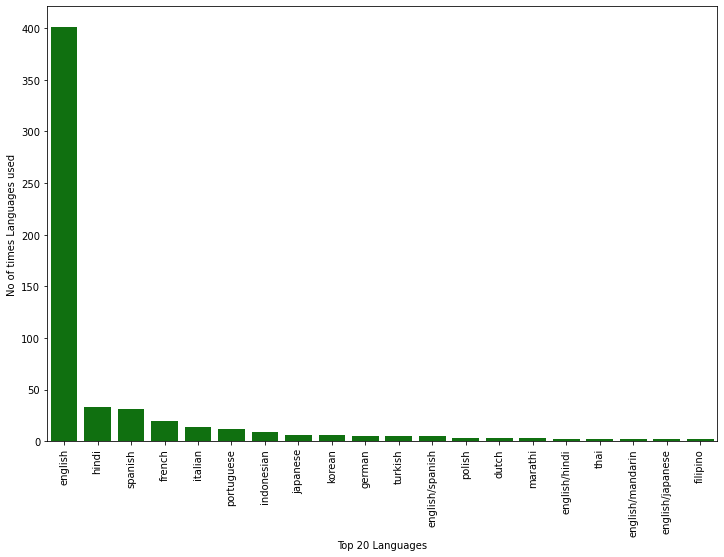

In [1029]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_20_langauge.index,y=top_20_langauge.values,data=df,color='green')
plt.xlabel('Top 20 Languages')
plt.xticks(rotation=90)
plt.ylabel('No of times Languages used')
plt.show()

Comment: English is the most used language (401 counts) followed by Hindi with 33 count Then Spanish, French and so on¶

# 4- Year

In [1030]:
df.year.unique

<bound method Series.unique of 0      2019
1      2020
2      2019
3      2018
4      2020
       ... 
579    2018
580    2015
581    2018
582    2020
583    2020
Name: year, Length: 584, dtype: int64>

In [1031]:
df.year.value_counts()

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: year, dtype: int64

In [1032]:
year=df.year.value_counts()

In [1033]:
year.index

Int64Index([2020, 2019, 2018, 2021, 2017, 2016, 2015, 2014], dtype='int64')

In [1034]:
year.values

array([183, 125,  99,  71,  66,  30,   9,   1])

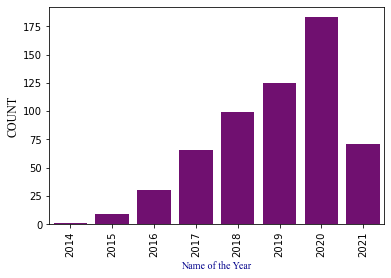

In [1035]:
sns.barplot(x=year.index,y=year.values,color='Purple')
plt.xlabel('Name of the Year',fontdict = {'family': 'times new roman', 'color':  'darkblue', 'weight': 'normal', 'size': 10})
plt.ylabel('COUNT',fontdict = {'family': 'times new roman','size':12})
plt.xticks(rotation=90)
plt.show()

Comment: 
- Netflix movies are increasing each year 
- Since 2021 is already running and has not finished yet so the full data on the 2021 is not available and counts is low
- As a result, the difference between 2020 and 2021 is normal.

# 5- Month

In [1036]:
months = df.month.unique()
months

array(['aug', 'dec', 'jan', 'oct', 'nov', 'jun', 'mar', 'may', 'apr',
       'sep', 'feb', 'jul'], dtype=object)

In [1037]:
month = df.month.value_counts(sort = False)
month 

aug    37
dec    51
jan    37
oct    77
nov    57
jun    35
mar    48
may    53
apr    63
sep    53
feb    39
jul    34
Name: month, dtype: int64

In [1038]:
month.index

Index(['aug', 'dec', 'jan', 'oct', 'nov', 'jun', 'mar', 'may', 'apr', 'sep',
       'feb', 'jul'],
      dtype='object')

In [1039]:
month.values

array([37, 51, 37, 77, 57, 35, 48, 53, 63, 53, 39, 34])

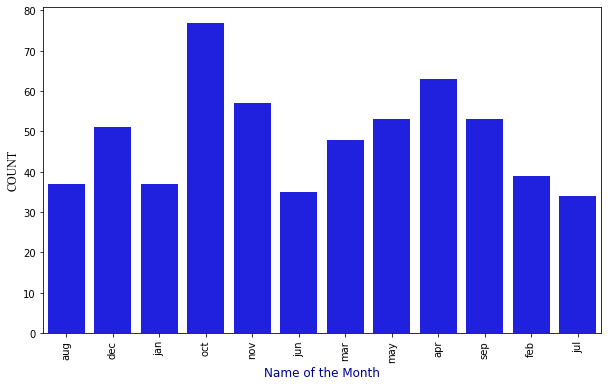

In [1040]:
plt.figure(figsize=(10,6))
sns.barplot(x=month.index,y=month.values,color='blue')
plt.xlabel('Name of the Month',fontdict = { 'color':  'darkblue', 'weight': 'normal', 'size': 12})
plt.ylabel('COUNT',fontdict = {'family': 'times new roman','size':12})
plt.xticks(rotation=90)
plt.show()

Comment: 
- October and April have the highest number of movies releases
- Summer (jun, july and aug) have the lowest number of movies releases

# 6- Week day

In [1041]:
week_day = df.week_day.value_counts(sort = False)
week_day

mon     17
fri    383
thu     59
tue     29
wed     82
sun      9
sat      5
Name: week_day, dtype: int64

In [1042]:
week_day.index

Index(['mon', 'fri', 'thu', 'tue', 'wed', 'sun', 'sat'], dtype='object')

In [1043]:
week_day.values

array([ 17, 383,  59,  29,  82,   9,   5])

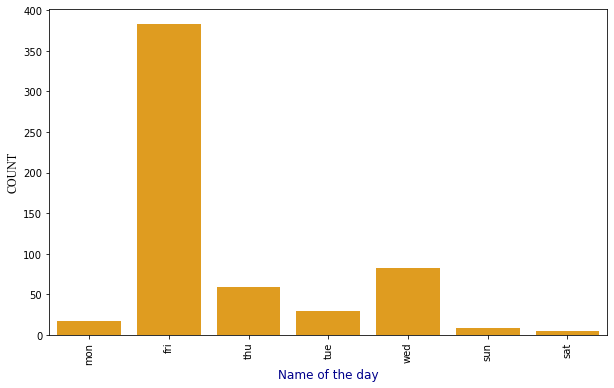

In [1044]:
plt.figure(figsize=(10,6))
sns.barplot(x=week_day.index,y=week_day.values,color='orange')
plt.xlabel('Name of the day',fontdict = { 'color':  'darkblue', 'weight': 'normal', 'size': 12})
plt.ylabel('COUNT',fontdict = {'family': 'times new roman','size':12})
plt.xticks(rotation=90)
plt.show()

Comment:
- Friday has the highest number of new movie releases.

- Saturday and Sunday have the lowest number of new movie releases.

# 7- Rating 

In [1045]:
df['rating'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: rating, dtype: float64

Comment:
 - max rating = 9
 - min rating = 2.5
 - average rating = 6.27

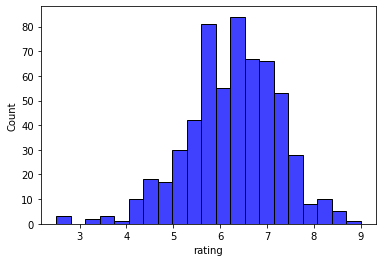

In [1046]:
#rating distribution plot
sns.histplot(x=df['rating'],color='blue',data=df)
plt.show()

Comment: 
   - It is observed that rating is left skewed which means that it is negatively distributed toward left (not uniformly distributed)

<AxesSubplot:xlabel='rating', ylabel='Count'>

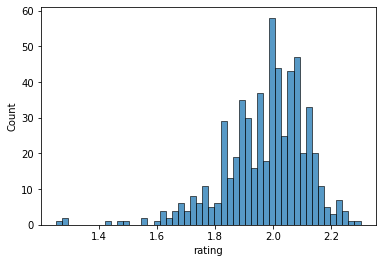

In [1047]:
rating_logs = np.log1p(df.rating)
sns.histplot(rating_logs,bins=50)

In [1048]:
#title and genre of maximum rating
df[df['rating']==df['rating'].max()][['title','genre']]

,title,genre
583,david_attenborough:_a_life_on_our_planet,documentary


Comment: Maximum rating goes to "david_attenborough:_a_life_on_our_planet" and it is a documentary movie

In [1049]:
#title and genre of minimum rating
df[df['rating']==df['rating'].min()][['title','genre']]

,title,genre
0,enter_the_anime,documentary


Comment: Minimum rating goes to "enter_the_anime" and it is also a documentary movie

# Top 15 Ratings by Genre

In [1050]:
top_15_ratings_by_genre = df.groupby("genre")["rating"].mean().nlargest(15)
top_15_ratings_by_genre

genre
animation/christmas/comedy/adventure    8.200000
musical_/_short                         7.700000
concert_film                            7.633333
anthology/dark_comedy                   7.600000
animation_/_science_fiction             7.500000
making-of                               7.450000
action-adventure                        7.300000
coming-of-age_comedy-drama              7.200000
drama-comedy                            7.200000
historical_drama                        7.200000
one-man_show                            7.133333
animation_/_short                       7.125000
mentalism_special                       7.100000
war_drama                               7.100000
animation_/_comedy                      7.000000
Name: rating, dtype: float64

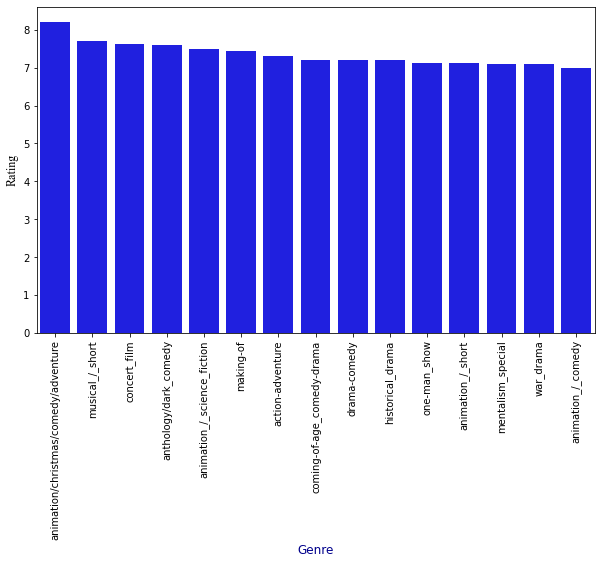

In [1051]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_15_ratings_by_genre.index,y=top_15_ratings_by_genre.values,color='blue')
plt.xlabel('Genre',fontdict = { 'color':  'darkblue', 'weight': 'normal', 'size': 12})
plt.ylabel('Rating',fontdict = {'family': 'times new roman','size':12})
plt.xticks(rotation=90)
plt.show()

# Lowest 15 Ratings by Genre

In [1052]:
lowest_15_ratings_by_genre = df.groupby("genre")["rating"].mean().nsmallest(15)
lowest_15_ratings_by_genre

genre
heist_film/thriller          3.700000
musical/western/fantasy      3.900000
horror_anthology             4.300000
political_thriller           4.300000
superhero-comedy             4.400000
science_fiction/drama        4.533333
romance_drama                4.600000
mystery                      4.650000
anime_/_short                4.700000
horror_thriller              4.700000
heist                        4.800000
animation/superhero          4.900000
teen_comedy-drama            5.100000
christmas_musical            5.200000
science_fiction_adventure    5.200000
Name: rating, dtype: float64

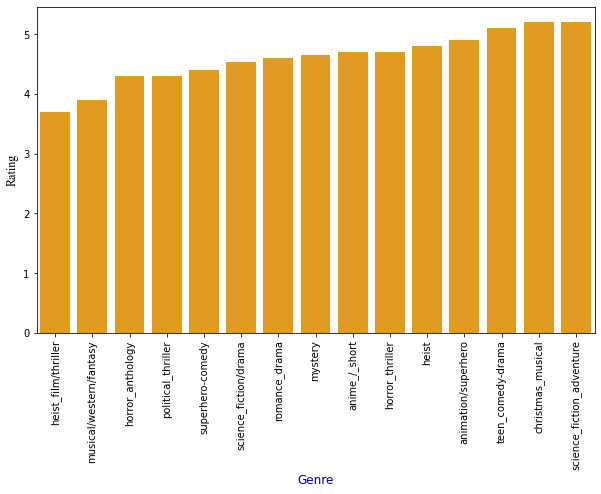

In [1053]:
plt.figure(figsize=(10,6))
sns.barplot(x=lowest_15_ratings_by_genre.index,y=lowest_15_ratings_by_genre.values,color='orange')
plt.xlabel('Genre',fontdict = { 'color':  'darkblue', 'weight': 'normal', 'size': 12})
plt.ylabel('Rating',fontdict = {'family': 'times new roman','size':12})
plt.xticks(rotation=90)
plt.show()

# Top 10 Rating Movies

In [1054]:
top_10_ratings = df[["rating", "title", "genre", "year", "language"]].sort_values(["rating"], ascending=False)[:10]
top_10_ratings

,rating,title,genre,year,language
583,9.0,david_attenborough:_a_life_on_our_planet,documentary,2020,english
582,8.6,emicida:_amarelo_-_it's_all_for_yesterday,documentary,2020,portuguese
581,8.5,springsteen_on_broadway,one-man_show,2018,english
580,8.4,winter_on_fire:_ukraine's_fight_for_freedom,documentary,2015,english/ukranian/russian
579,8.4,taylor_swift:_reputation_stadium_tour,concert_film,2018,english
578,8.4,ben_platt:_live_from_radio_city_music_hall,concert_film,2020,english
577,8.3,dancing_with_the_birds,documentary,2019,english
576,8.3,cuba_and_the_cameraman_,documentary,2017,english
573,8.2,klaus,animation/christmas/comedy/adventure,2019,english
571,8.2,13th,documentary,2016,english


# Lowest 10 Rate Movies

In [1055]:
lowest_10_ratings = df[["rating", "title", "genre", "year", "language"]].sort_values(["rating"])[:10]
lowest_10_ratings

,rating,title,genre,year,language
0,2.5,enter_the_anime,documentary,2019,english/japanese
1,2.6,dark_forces,thriller,2020,spanish
2,2.6,the_app,science_fiction/drama,2019,italian
3,3.2,the_open_house,horror_thriller,2018,english
4,3.4,kaali_khuhi,mystery,2020,hindi
5,3.5,drive,action,2019,hindi
6,3.7,leyla_everlasting,comedy,2020,turkish
7,3.7,the_last_days_of_american_crime,heist_film/thriller,2020,english
8,3.9,paradox,musical/western/fantasy,2018,english
9,4.1,sardar_ka_grandson,comedy,2021,hindi


In [1056]:
df.corr()

,runtime,rating,year
runtime,1.000000,-0.040896,0.069262
rating,-0.040896,1.000000,-0.141347
year,0.069262,-0.141347,1.000000


<AxesSubplot:>

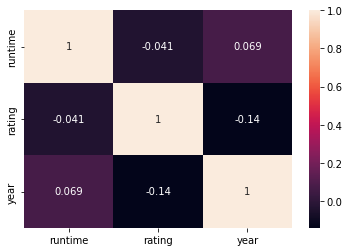

In [1057]:
sns.heatmap(df.corr(),annot=True)

Comment: correlation between rating and runtime is -0.041

In [1058]:
df[['runtime','rating']].corr()

,runtime,rating
runtime,1.000000,-0.040896
rating,-0.040896,1.000000


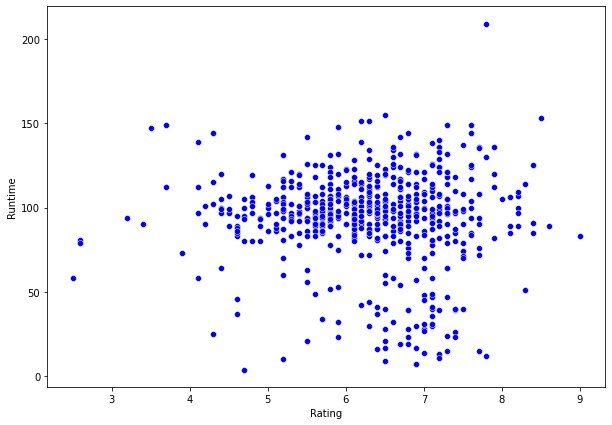

In [1059]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['rating'],y=df['runtime'],color='blue',data=df)
plt.xlabel('Rating')
plt.ylabel('Runtime')
plt.show()


Comment: it is observed that no significant relationship between runtime and rating

# Model selection process and parameter tuning

Datasets preparation:
 - Apply the log tranform to target variable -> rating
 - Do train/validation/test split with 60%/20%/20% distribution.
 - Use the train_test_split function and set the random_state parameter to 11

In [1439]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#y_train = np.log1p(df_train.rating.values)
#y_val = np.log1p(df_val.rating.values)
#y_test = np.log1p(df_test.rating.values)

y_train = df_train.rating.values
y_val = df_val.rating.values
y_test = df_test.rating.values


#delete date as it is a datetime datatype and it is already splited in columns(year, month and week_day) 
del df_train['date']
del df_val['date']
del df_test['date']

In [1230]:
del df_train['rating']
del df_val['rating']
del df_test['rating']

In [1231]:
df_train

,title,genre,premiere,runtime,language,year,month,week_day
0,the_last_laugh,comedy-drama,"january_11,_2019",98,english,2019,jan,fri
1,double_dad,comedy-drama,"january_15,_2021",103,portuguese,2021,jan,fri
2,6_balloons,drama,"april_6,_2018",75,english,2018,apr,fri
3,see_you_yesterday,science_fiction,"may_17,_2019",87,english,2019,may,fri
4,rooting_for_roona,documentary,"october_15,_2020",41,bengali,2020,oct,thu
...,...,...,...,...,...,...,...,...
345,soni,crime_drama,"january_18,_2019",97,hindi,2019,jan,fri
346,little_evil,comedy_horror,"september_1,_2017",94,english,2017,sep,fri
347,the_incredible_jessica_james,comedy,"july_28,_2017",83,english,2017,jul,fri
348,all_day_and_a_night,drama,"may_1,_2020",121,english,2020,may,fri


Use DictVectorizer to turn train and validation into matrices

In [1232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     350 non-null    object
 1   genre     350 non-null    object
 2   premiere  350 non-null    object
 3   runtime   350 non-null    int64 
 4   language  350 non-null    object
 5   year      350 non-null    int64 
 6   month     350 non-null    object
 7   week_day  350 non-null    object
dtypes: int64(2), object(6)
memory usage: 22.0+ KB


In [1440]:
features = ['title', 'genre', 'premiere', 'runtime', 'language',  'year', 'month', 'week_day']

In [1441]:
train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

In [1442]:
from sklearn.feature_extraction import DictVectorizer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


In [1443]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)


# Model 1 : DecisionTreeRegressor

In [1237]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error

In [1238]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [1239]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- genre=documentary <= 0.50
|   |--- value: [5.96]
|--- genre=documentary >  0.50
|   |--- value: [6.92]



In [1240]:
y_pred = dt.predict(X_val)
rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
rmse_val

1.0105619886116186

In [1241]:
#selecting max_depth
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_val)
    rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(depth, rmse_val)

1 1.0105619886116182
2 1.0021521468336005
3 1.02550600725699
4 0.9959744301790807
5 1.0147249547940638
6 1.0286769814379644
10 0.959574982073654
15 0.9897819998515839
20 1.050121424893447
None 1.007917375531068


- 5 1.0147249547940638 -> ok
- 6 1.0286769814379644 -> ok
- 20 1.050121424893447

In [1242]:
scores = []

for depth in [1, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
        
        scores.append((depth, s, rmse_val))
    

In [1243]:
columns = ['max_depth', 'min_samples_leaf', 'rmse_val']
df_scores = pd.DataFrame(scores, columns=columns)

In [1244]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse_val'])
df_scores_pivot.round(3)

rmse_val              
max_depth               1      5      6
min_samples_leaf                       
1                   1.011  1.015  1.025
5                   1.011  1.037  1.029
10                  1.011  1.005  0.990
15                  1.011  1.008  1.005
20                  1.011  0.997  0.997
100                 1.074  1.075  1.075
200                 1.044  1.044  1.044
500                 1.044  1.044  1.044

- Lower values of RMSE indicate better fit

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

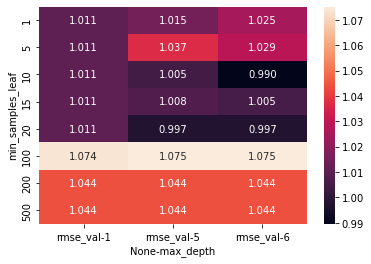

In [1245]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [1246]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=100)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=100)

In [1251]:
y_pred = dt.predict(X_val)
rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
rmse_val 

1.0752491409468956

In [1252]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- year <= 2018.50
|   |--- value: [6.45]
|--- year >  2018.50
|   |--- runtime <= 96.50
|   |   |--- value: [6.22]
|   |--- runtime >  96.50
|   |   |--- value: [5.94]



# Feature importance analysis

In [1253]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [1254]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names()
df_importances['importance'] = dt.feature_importances_
df_importances

,feature,importance
0,genre=action,0.000000
1,genre=action-adventure,0.000000
2,genre=action-thriller,0.000000
3,genre=action/comedy,0.000000
4,genre=action_comedy,0.000000
...,...,...
746,week_day=sun,0.000000
747,week_day=thu,0.000000
748,week_day=tue,0.000000
749,week_day=wed,0.000000


In [1255]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
750,year,0.740174
392,runtime,0.259826
493,title=finding_'ohana,0.000000
495,title=first_they_killed_my_father,0.000000
496,title=forgive_us_our_debts,0.000000


year is the most important feature

# Model 2 : Random Forest Regressor

In [1256]:
from sklearn.ensemble import RandomForestRegressor

In [1257]:
scores = []

for n in range(10, 201, 10):
    
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, rmse_val))

In [1258]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse_val'])

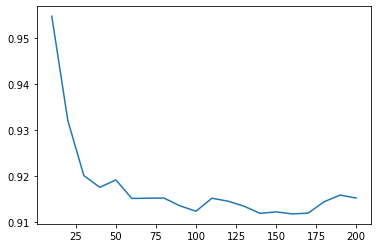

In [1259]:
plt.plot(df_scores.n_estimators, df_scores.rmse_val)

In [1260]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
    
        scores.append((d,n, rmse_val))

In [1261]:
columns = ['max_depth', 'n_estimators', 'rmse_val']
df_scores = pd.DataFrame(scores, columns=columns)

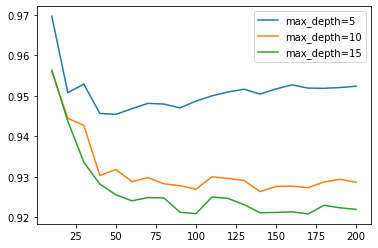

In [1262]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse_val,
             label='max_depth=%d' % d)

plt.legend()

In [1263]:
max_depth = 15

In [1264]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
    
        scores.append((s,n, rmse_val))

In [1265]:
columns = ['min_samples_leaf', 'n_estimators', 'rmse_val']
df_scores = pd.DataFrame(scores, columns=columns)

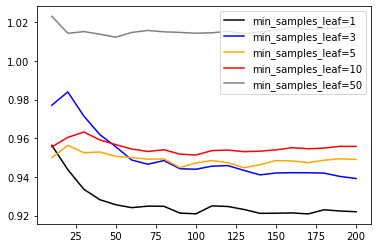

In [1269]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.rmse_val,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [1270]:
min_samples_leaf = 3

In [1275]:
rf = RandomForestRegressor(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=200,
                      random_state=1)

In [1276]:
y_pred = rf.predict(X_val)
rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
rmse_val 

0.9391884906976947

# Feature importance analysis 

In [1277]:
rf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.39551913e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.60532499e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.16675833e-02, 5.03508266e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.55952617e-02, 1.90220155e-03, 0.00000000e+00, 2.77764838e-01,
       2.42782130e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.14385801e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [1278]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names()
df_importances['importance'] = rf.feature_importances_
df_importances

,feature,importance
0,genre=action,0.000000
1,genre=action-adventure,0.000000
2,genre=action-thriller,0.000000
3,genre=action/comedy,0.000000
4,genre=action_comedy,0.000000
...,...,...
746,week_day=sun,0.000254
747,week_day=thu,0.010616
748,week_day=tue,0.005550
749,week_day=wed,0.012075


In [1279]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
392,runtime,0.286442
35,genre=documentary,0.277765
750,year,0.079832
25,genre=comedy,0.051668
80,genre=thriller,0.049854


runtime is the most important feature

# Model 3 : XGBoost 

In [1356]:
import xgboost as xgb

In [1357]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [1358]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [1359]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [1360]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [1361]:
s = output.stdout

In [1362]:
print(s[:200])

[0]	train-rmse:4.11758	val-rmse:4.29093
[5]	train-rmse:0.93427	val-rmse:1.24155
[10]	train-rmse:0.52138	val-rmse:0.96079
[15]	train-rmse:0.45351	val-rmse:0.94370
[20]	train-rmse:0.41010	val-rmse:0.940


In [1363]:
df_score = parse_xgb_output(output)

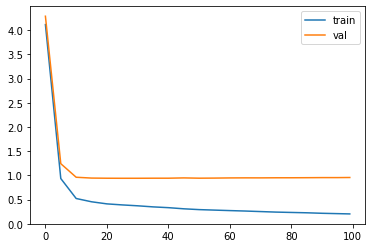

In [1364]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

In [1365]:
scores = {}

In [1366]:
scores['eta=0.3'] = parse_xgb_output(output)

In [1367]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [1368]:
scores['eta=0.1'] = parse_xgb_output(output)

In [1369]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [1370]:
scores['eta=0.01'] = parse_xgb_output(output)

(50.0, 100.0)

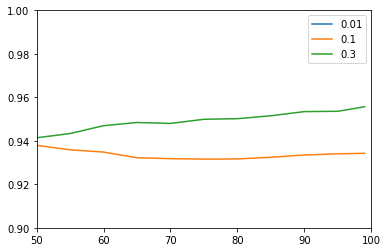

In [1371]:
plt.plot(scores['eta=0.01'].num_iter, scores['eta=0.01'].val_rmse,
        label='0.01')
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_rmse,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_rmse,
        label='0.3')
plt.legend()

plt.ylim([0.9, 1])
plt.xlim([50, 100])

Choose 0.1

In [1372]:
scores = {}

In [1381]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth':3,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [1382]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

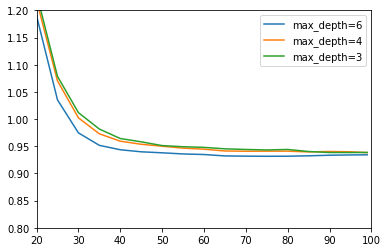

In [1383]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

plt.ylim(0.8, 1.2)
plt.xlim([20, 100])
plt.legend()

 i will choose max_depth = 6

In [1384]:
scores = {}

In [1393]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 30,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [1394]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

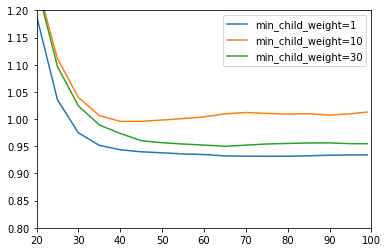

In [1395]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

plt.ylim(0.8, 1.2)
plt.xlim([20, 100])
plt.legend()

i will choose min_child_weight=1

In [1396]:
#here is the parameters of xgb after parameter tuning 

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [1397]:
y_pred = model.predict(dval)
rmse=np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.9342555831456699

# Selecting the best model

In [1401]:
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=100)

In [1402]:
y_pred = dt.predict(X_val)
rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
rmse_val 

1.0752491409468956

In [1403]:
rf = RandomForestRegressor(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=200,
                      random_state=1)

In [1404]:
y_pred = rf.predict(X_val)
rmse_val= np.sqrt(mean_squared_error(y_val, y_pred))
rmse_val 

0.9391884906976947

In [1405]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [1406]:
y_pred = model.predict(dval)
rmse=np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.9342555831456699

# RMSE of the models:
    
- Decision Tree -> 1.075
- Random Forest -> 0.939
- xgboost -> 0.934


so the best model is xgboost 

# Training the final model

In [1444]:
df_full_train = df_full_train.reset_index(drop=True)
y_train = df_train.rating.values
y_full_train = df_full_train.rating.astype(int).values
#del df_full_train['rating']

In [1445]:
del df_full_train['rating']

In [1446]:
del df_full_train['date']

In [1447]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [1448]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [1449]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight':1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=100)

In [1450]:
y_pred = model.predict(dtest)

In [1451]:
rmse=np.sqrt(mean_squared_error(y_val, y_pred))
rmse

1.305133882747928